In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [30]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# We will read our CSV file from our Google Drive and store it in a variable called windowsData
import pandas as pd
windowsData = pd.read_csv('/content/drive/MyDrive/datasets/Windows_processed/windows10_dataset.csv')
print(windowsData.shape)
windowsData.head()

(35975, 127)


,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.90817156,0,0.078240397,0,61.02750947,29.90817156,66.2001486,480.0949912,...,0.134876119,0.163098103,2.822198461,1924988.236,402.5827836,9100.481592,13.48761188,0.000405118,0,normal
1,1554206319,9,31.75168186,0,0.312520973,0,59.14459419,31.75168186,66.24773489,427.0412837,...,0.157564294,0.189279353,3.17150584,1497232.743,355.1343322,11153.55449,15.75642941,0.000532995,0,normal
2,1554206329,5,29.49516707,0,1.16822183,0,46.02794011,29.49516707,66.90038148,1159.426821,...,0.401773775,0.782471877,38.06981014,1854228.536,760.4317685,26994.26595,40.17737752,0.001028323,0,normal
3,1554206339,12,18.22437505,0,1.097191902,0,47.80621859,18.22437505,79.54520811,736.622011,...,0.259062331,0.768934004,50.98716725,15912390.29,699.4999538,53141.6638,25.90623311,0.001099429,0,normal
4,1554206349,12,14.86118688,0,1.562431019,0,41.8731513,14.86118688,82.73513724,896.1085985,...,0.103836186,1.081729712,97.7893526,23609299.7,1184.550425,40988.68444,10.38361856,0.000912738,0,normal


(35975, 127)


,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.90817156,0,0.078240397,0,61.02750947,29.90817156,66.2001486,480.0949912,...,0.134876119,0.163098103,2.822198461,1924988.236,402.5827836,9100.481592,13.48761188,0.000405118,0,normal
1,1554206319,9,31.75168186,0,0.312520973,0,59.14459419,31.75168186,66.24773489,427.0412837,...,0.157564294,0.189279353,3.17150584,1497232.743,355.1343322,11153.55449,15.75642941,0.000532995,0,normal
2,1554206329,5,29.49516707,0,1.16822183,0,46.02794011,29.49516707,66.90038148,1159.426821,...,0.401773775,0.782471877,38.06981014,1854228.536,760.4317685,26994.26595,40.17737752,0.001028323,0,normal
3,1554206339,12,18.22437505,0,1.097191902,0,47.80621859,18.22437505,79.54520811,736.622011,...,0.259062331,0.768934004,50.98716725,15912390.29,699.4999538,53141.6638,25.90623311,0.001099429,0,normal
4,1554206349,12,14.86118688,0,1.562431019,0,41.8731513,14.86118688,82.73513724,896.1085985,...,0.103836186,1.081729712,97.7893526,23609299.7,1184.550425,40988.68444,10.38361856,0.000912738,0,normal


In [32]:
# Counting the empty columns
windowsData.isna().sum().sum()

0

0

In [33]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values= ' ', strategy='constant', fill_value = -1)

# Imputing Columns 1 to 24
impute.fit(windowsData.iloc[:,1:126])
windowsData.iloc[:,1:126] = impute.transform(windowsData.iloc[:,1:126])

# Imputing Columns 1 to 24
impute.fit(windowsData.iloc[:,1:126])
windowsData.iloc[:,1:126] = impute.transform(windowsData.iloc[:,1:126])

windowsData.iloc[:,1:126] = (windowsData.iloc[:,1:126]).astype(float)

pd.set_option('display.max_rows', 129)

In [34]:
# #---corelation heatmap----
# fig, ax = plt.subplots(figsize=(100,100))
# sns.heatmap(windowsData.iloc[:,0:126].corr(),annot=True, linewidth = 10, ax=ax, fmt='.0%')

In [35]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
# from sklearn.metrics import f1_score

#**Without Oversampling**

In [37]:
x = windowsData.drop(['ts','type','label'],axis=1)
y = windowsData['label']

In [11]:
# --------------------------KNN -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions

#Accuracy Score

from sklearn.metrics import accuracy_score
knnAccuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy of knn : ",knnAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
knnf1_scr = f1_score(y_test, y_pred_knn)
print("f1_score of knn : ",knnf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score, confusion_matrix
auc = roc_auc_score (y_test, y_pred_knn)
print('AUC: %.2f' % auc)

[0. 0. 0. ... 0. 0. 0.]
Accuracy of knn :  96.66370106761566 %
f1_score of knn :  94.67329545454545 %
AUC: 0.96


In [12]:
confusion_matrix(y_test,y_pred_knn)

array([[3013,   95],
       [  55, 1333]])

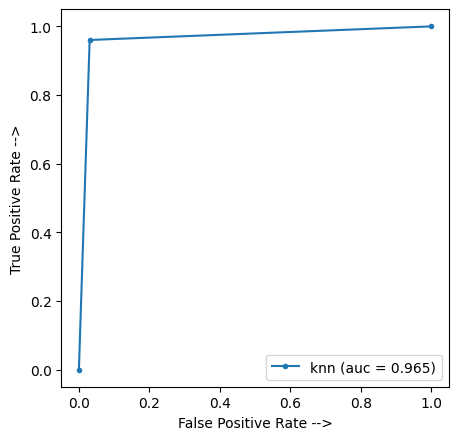

In [13]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Oversampling

In [14]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0.0: 21763, 1.0: 9716}
After oversampling {0.0: 21763, 1.0: 21763}


In [15]:
# --------------------------KNN -----------------------------------
for train_indices, test_indices in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_indices], x_train_sm.iloc[test_indices], y_train_sm.iloc[train_indices], y_train_sm.iloc[test_indices]
    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
knnAccuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy of Knn : ",knnAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
knnf1_scr = f1_score(y_test, y_pred_knn)
print("f1_score of Knn : ",knnf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_knn)
print('AUC: %.2f' % auc)

[0. 0. 0. ... 1. 1. 1.]
Accuracy of Knn :  98.08823529411764 %
f1_score of Knn :  98.11183732752362 %
AUC: 0.98


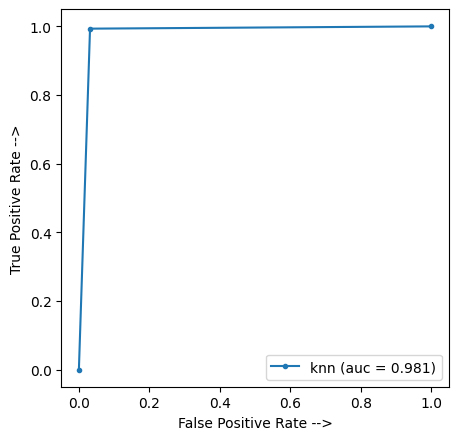

In [16]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# **undersampling on the data**

In [17]:
x = windowsData.drop(['ts','type','label'],axis=1)
y = windowsData['label']

In [18]:
x = windowsData.drop(['ts','type','label'],axis=1)
y = windowsData['label']
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter

#Seeing the value count before oversampling
print("Before undersampling", Counter(y_train))

rus = RandomUnderSampler(random_state=12)
x_unsampled, y_unsampled = rus.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
print("After undersampling",Counter(y_unsampled))

Before undersampling Counter({0.0: 21763, 1.0: 9716})
After undersampling Counter({0.0: 9716, 1.0: 9716})


In [19]:
# --------------------------KNN -----------------------------------
for train_index, test_index in skf.split(x_unsampled, y_unsampled):
    x_train, x_test, y_train, y_test = x_unsampled.iloc[train_index], x_unsampled.iloc[test_index], y_unsampled.iloc[train_index], y_unsampled.iloc[test_index]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
knnAccuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy of Knn : ",knnAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
knnf1_scr = f1_score(y_test, y_pred_knn)
print("f1_score of Knn : ",knnf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_knn)
print('AUC: %.2f' % auc)

[0. 0. 0. ... 1. 1. 1.]
Accuracy of Knn :  97.28283244133388 %
f1_score of Knn :  97.32793522267205 %
AUC: 0.97


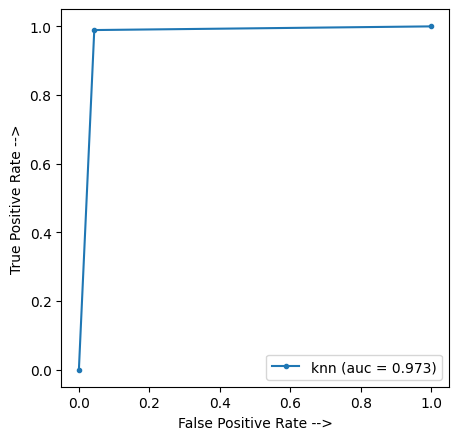

In [20]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

#**Unnecessary**

In [21]:
# #ROC CURVE:
# from sklearn.metrics import roc_curve, auc

# logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
# auc_logistic = auc(logistic_fpr, logistic_tpr)

# plt.figure(figsize=(5, 5), dpi=100)
# plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

# plt.xlabel('False Positive Rate -->')
# plt.ylabel('True Positive Rate -->')

# plt.legend()

# plt.show()

In [22]:
# # --------------------------DecisionTree -----------------------------------
# from sklearn.tree import DecisionTreeClassifier
# from statistics import mean
# DT_accuracy_scores = []
# DT_f1_scores = []

# for train_index, test_index in skf.split(x, y):
#     x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

#     DT_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
#     DT_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

# print('K-Fold Accuracy Score: ',mean(DT_accuracy_scores))
# print('K-Fold F1 Score:', mean(DT_f1_scores))

In [23]:
# # --------------------------Logistic Reg -----------------------------------

# und_x = under_sample.loc[:, windowsData.columns !=target]
# und_y = under_sample.loc[:, windowsData.columns == target]

# from sklearn.linear_model import LogisticRegression
# from statistics import mean
# lru_accuracy_scores = []
# lru_f1_scores = []

# for train_index, test_index in skf.split(und_x, und_y):
#     x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]
#     lru_accuracy_scores.append(get_accuracy_score(LogisticRegression(solver='newton-cg'), x_train, x_test, y_train, y_test))
#     lru_f1_scores.append(get_f1_score(LogisticRegression(solver='newton-cg'), x_train, x_test, y_train, y_test))

# print('Accuracy Score:',mean(lru_accuracy_scores))
# print('F1 Score:', mean(lru_f1_scores))

In [24]:
# # --------------------------DecisionTree -----------------------------------
# und_x = under_sample.loc[:, windowsData.columns !=target]
# und_y = under_sample.loc[:, windowsData.columns == target]

# from sklearn.tree import DecisionTreeClassifier
# from statistics import mean
# DT_accuracy_scores = []
# DT_f1_scores = []

# for train_index, test_index in skf.split(und_x, und_y):
#     x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]

#     DT_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
#     DT_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

# print('K-Fold Accuracy Score: ',mean(DT_accuracy_scores))
# print('K-Fold F1 Score:', mean(DT_f1_scores))

In [25]:
# # --------------------------DecisionTree -----------------------------------
# from sklearn.tree import DecisionTreeClassifier
# from statistics import mean
# DT_accuracy_scores = []
# DT_f1_scores = []

# for train_index, test_index in skf.split(x_train_sm, y_train_sm):
#     x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

#     DT_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
#     DT_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

# print('K-Fold Accuracy Score: ',mean(DT_accuracy_scores))
# print('K-Fold F1 Score:', mean(DT_f1_scores))

In [26]:
# # --------------------------Random Forest -----------------------------------
# RF_accuracy_scores = []
# RF_f1_scores = []

# for train_index, test_index in skf.split(x_train_sm, y_train_sm):
#     x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

#     RF_accuracy_scores.append(get_accuracy_score(RandomForestClassifier(n_estimators=10, random_state=1), x_train, x_test, y_train, y_test))
#     RF_f1_scores.append(get_f1_score(RandomForestClassifier(), x_train, x_test, y_train, y_test))

# print('Accuracy Score after oversampling: ',mean(RF_accuracy_scores))
# print('F1 Score after oversampling:', mean(RF_f1_scores))

In [27]:
# # --------------------------Random Forest -----------------------------------
# und_x = under_sample.loc[:, windowsData.columns !=target]
# und_y = under_sample.loc[:, windowsData.columns == target]

# from sklearn.ensemble import RandomForestClassifier
# from statistics import mean
# RF_accuracy_scores = []
# RF_f1_scores = []

# for train_index, test_index in skf.split(und_x, und_y):
#     x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]

#     DT_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
#     DT_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

# print('K-Fold Accuracy Score: ',mean(RF_accuracy_scores))
# print('K-Fold F1 Score:', mean(RF_f1_scores))

In [28]:
# # --------------------------Logistic Reg -----------------------------------
# from sklearn.linear_model import LogisticRegression
# from statistics import mean
# lr_accuracy_scores = []
# lr_f1_scores = []

# for train_index, test_index in skf.split(x_train_sm, y_train_sm):
#     x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

#     lr_accuracy_scores.append(get_accuracy_score(LogisticRegression(class_weight= 'balanced'), x_train, x_test, y_train, y_test))
#     lr_f1_scores.append(get_f1_score(LogisticRegression(class_weight= 'balanced'), x_train, x_test, y_train, y_test))

# print('K-Fold Accuracy Score: ',mean(lr_accuracy_scores))
# print('K-Fold F1 Score:', mean(lr_f1_scores))